 # Лабораторная работа №4
 ## Вариант 19

$
y = \sqrt[3]x;
m_x = 1;
\sigma = \sqrt3;
y_0 = 0
$

In [1]:
from random import random
import numpy as np
from matplotlib import pyplot as plt
from math import floor, pow
from scipy import stats

a = -2
b = 4
alphas = [0.01, 0.05, 0.09, 0.2, 0.4, 0.5]
n_values = [30, 50, 70, 100, 150]

## Теоретическая плотность распределения

![](./analytical1.jpg)

In [2]:
def func(value):
    is_negative = value < 0
    result = pow(abs(value), 1 / 3)
    return -result if is_negative else result

borderA = func(a)
borderB = func(b)

def analytical_func_densiny(y):    
    if y >= borderA and y <= borderB:
        return (1 / 2) * pow(y, 2)
    return 0

def analytical_func_dist(y):    
    if y >= borderA and y <= borderB:
        return (1 / 6) * (pow(y, 3) - a)

    return 0 if y < borderA else 1

def get_eps():
    return random()

def get_x_sample(a, b, n):
    result = []
    for i in range(n):
        x = get_eps() * (b - a) + a
        result.append(x)
    return result

def get_y_sample(x_sample):
    result = []
    for x in x_sample:
        result.append(func(x))
    return sorted(result)

## Нахождение теоритического математического ожидания и дисперсии
![](./theory.jpg)

In [3]:
D = 1.09626
M = 0.4787

## Доверительный интервал для математического ожидания

In [4]:
def get_confidence_m(d, m, count):
    fracs = []
    gammas = []
    for alpha in alphas:
        gamma = 1 - alpha
        gammas.append(gamma)

        frac = (d * stats.t.ppf(gamma, count - 1)) / pow(count - 1, 1 / 2)
        fracs.append(2 * frac)
        
        left = round(m - frac, 5)
        right =  round(m + frac, 5)
    return gammas, fracs

def confidence_interval_m(count):
    # Задание 1
    x_sample = get_x_sample(a, b, count)
    y_sample = get_y_sample(x_sample)

    print('-' * 24 + 'START' + '-' * 24 + '\n')
    print('Выборка размером: %i\n' % count)

    print('Теоретическое МО: %f' % M)
    print('Теоретическая дисперсия: %f' % D)

    # 1. Точечная оценка МО
    m_estimate = 0
    for i in y_sample:
        m_estimate += i
    m_estimate /= count
    print('Точечная оценка МО: %f' % m_estimate)

    # 2. Точечная несмещенная оценка дисперсии
    d_estimate = 0
    for i in y_sample:
        d_estimate += pow(i - m_estimate, 2)
    d_estimate *= 1 / (count - 1)
    print('Точечная несмещенная оценка дисперсии: %f' % d_estimate)

    # 3. Доверительный интервал для оценки математического ожидания
    empiric_gammas, empiric_fracs = get_confidence_m(d_estimate, m_estimate, count)

    # 4. График зависимости величины доверительного интервала от уровня значимости
    plt.plot(empiric_gammas, empiric_fracs, label="[empiric] size from level dependency")
    plt.legend()
    plt.show()

    # 6. Доверительный интервал для оценки математического ожидания по теоретической дисперсии
    theory_gammas, theory_fracs = get_confidence_m(D, m_estimate, count)

    # 7. График зависимости величины доверительного интервала от уровня значимости по теоретической дисперсии
    plt.plot(theory_gammas, theory_fracs, label="[theory] size from level dependency")
    plt.legend()
    plt.show()

    # 8. Сравнение интервалов при эмперической и теоретической дисперсии
    plt.plot(empiric_gammas, empiric_fracs, label="empiric dispersion")
    plt.plot(theory_gammas, theory_fracs, label="theory dispersion")
    plt.legend()
    plt.show()
    print('\n' + '-' * 25 + 'END' + '-' * 25 + '\n')
    return empiric_fracs[0], theory_fracs[0]




------------------------START------------------------

Выборка размером: 30

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.437177
Точечная несмещенная оценка дисперсии: 1.229937


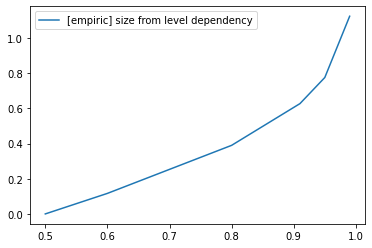

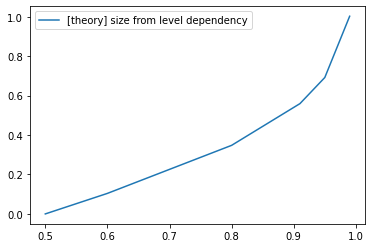

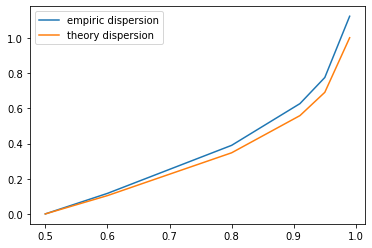


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 50

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.665657
Точечная несмещенная оценка дисперсии: 0.994937


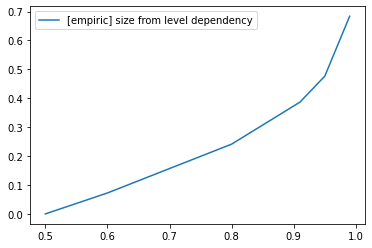

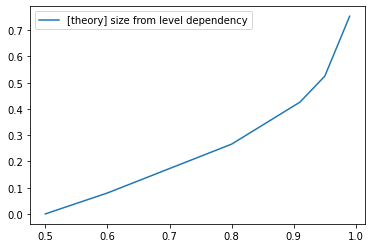

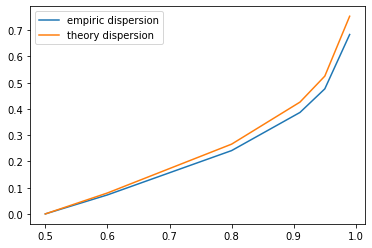


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 70

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.697387
Точечная несмещенная оценка дисперсии: 1.006555


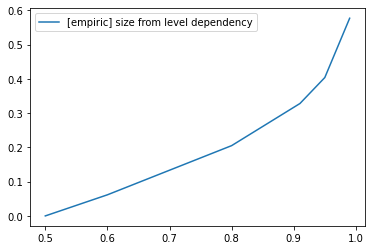

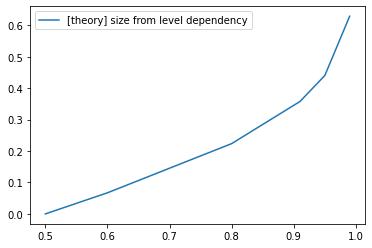

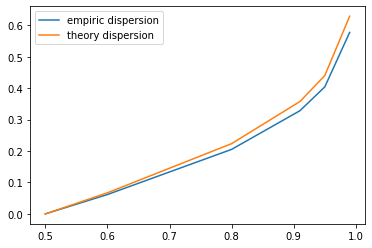


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 100

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.414939
Точечная несмещенная оценка дисперсии: 1.237316


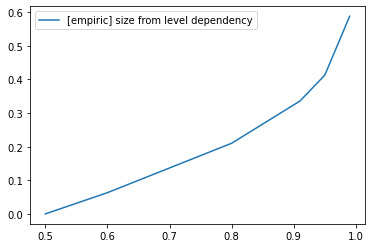

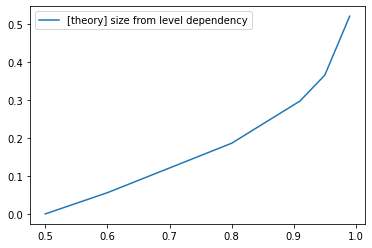

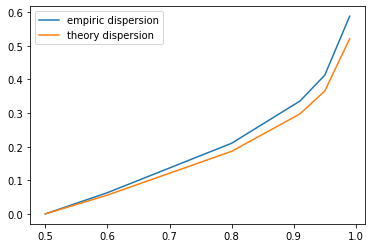


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 150

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.423556
Точечная несмещенная оценка дисперсии: 1.124435


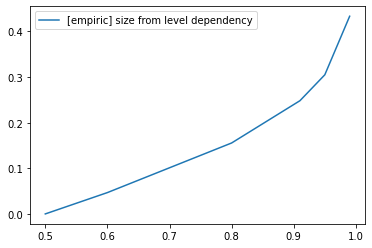

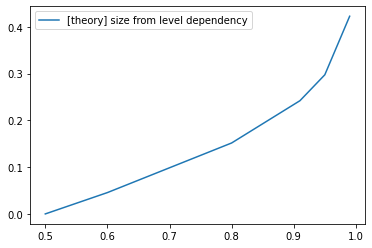

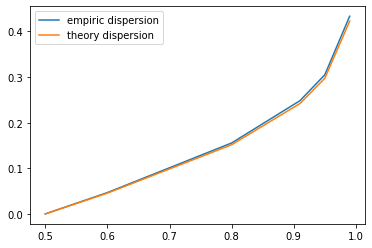


-------------------------END-------------------------



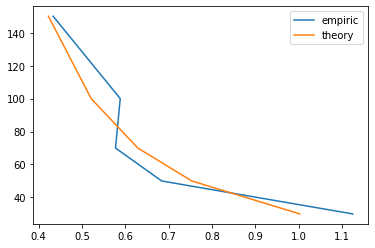

In [5]:
# 9. Пункты 2 - 8 с различным обьемом выборки
m_e_fracs = []
m_t_fracs = []
for i in n_values:
    e, t = confidence_interval_m(i)
    m_e_fracs.append(e)
    m_t_fracs.append(t)

# 10. График зависимости величины доверительного интервала от объема выборки
plt.plot(m_e_fracs, n_values, label="empiric")
plt.plot(m_t_fracs, n_values, label="theory")
plt.legend()
plt.show()

## Доверительный интервал для дисперсии

In [6]:
def get_confidence_d(d, count):
    fracs = []
    gammas = []
    for alpha in alphas:
        gamma = 1 - alpha
        gammas.append(gamma)

        fracLeft = count * d / stats.chi2.ppf((1 + gamma) / 2.0, count - 1)
        fracRight = count * d / stats.chi2.ppf((1 - gamma) / 2.0, count - 1)
        fracs.append(abs(fracRight - fracLeft))
    return gammas, fracs

def confidence_interval_d(count):
    # Задание 2
    x_sample = get_x_sample(a, b, count)
    y_sample = get_y_sample(x_sample)

    print('-' * 24 + 'START' + '-' * 24 + '\n')
    print('Выборка размером: %i\n' % count)

    print('Теоретическое МО: %f' % M)
    print('Теоретическая дисперсия: %f' % D)


    # 2. Точечная оценка МО
    m_estimate = 0
    for i in y_sample:
        m_estimate += i
    m_estimate /= count
    print('Точечная оценка МО: %f' % m_estimate)

    # 1. Точечная несмещенная оценка дисперсии
    d_estimate = 0
    for i in y_sample:
        d_estimate += pow(i - m_estimate, 2)
    d_estimate *= 1 / (count - 1)
    print('Точечная несмещенная оценка дисперсии: %f' % d_estimate)


    # 3. Доверительный интервал для оценки дисперсии    
    empiric_gammas, empiric_fracs = get_confidence_d(d_estimate, count)

    # 4. График зависимости величины доверительного интервала от уровня значимости
    plt.plot(empiric_gammas, empiric_fracs, label="[empiric] size from level dependency")
    plt.legend()
    plt.show()

    # 6. Доверительный интервал для оценки дисперсии по теоретическому математическому ожиданию
    d_mo_theory = 0
    for i in y_sample:
        d_mo_theory += pow(i - m_estimate, 2)
    d_mo_theory *= 1 / (count - 1)

    theory_gammas, theory_fracs = get_confidence_d(d_mo_theory, count)

    # 7. График зависимости величины доверительного интервала от уровня значимости по теоретическому матемотическому ожиданию
    plt.plot(theory_gammas, theory_fracs, label="[theory] size from level dependency")
    plt.legend()
    plt.show()

    # 8. Сравнение интервалов при эмперическому и теоретическому математическому
    plt.plot(empiric_gammas, empiric_fracs, label="empiric dispersion")
    plt.plot(theory_gammas, theory_fracs, label="theory dispersion")
    plt.legend()
    plt.show()
    print('\n' + '-' * 25 + 'END' + '-' * 25 + '\n')
    return empiric_fracs[0], theory_fracs[0]

------------------------START------------------------

Выборка размером: 30

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.467631
Точечная несмещенная оценка дисперсии: 1.069973


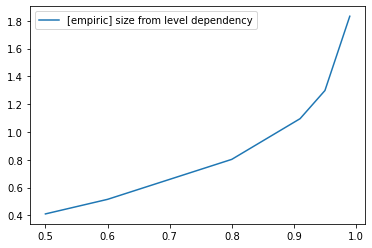

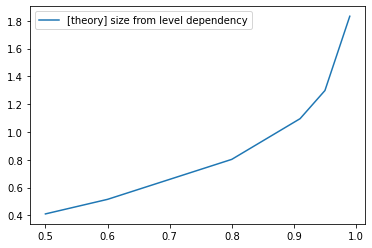

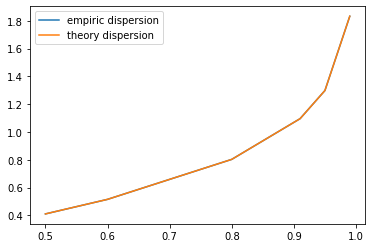


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 50

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.671217
Точечная несмещенная оценка дисперсии: 0.975066


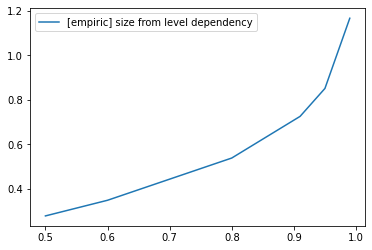

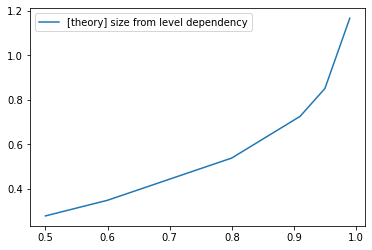

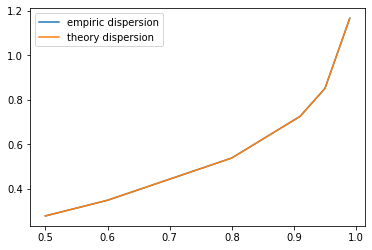


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 70

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.277671
Точечная несмещенная оценка дисперсии: 1.026399


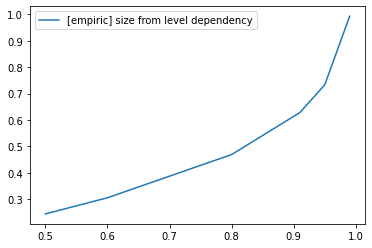

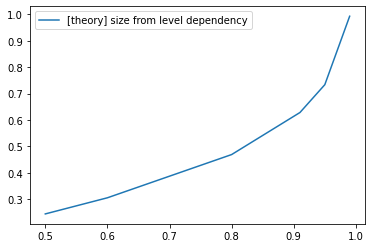

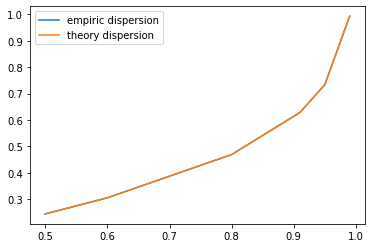


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 100

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.488845
Точечная несмещенная оценка дисперсии: 1.136989


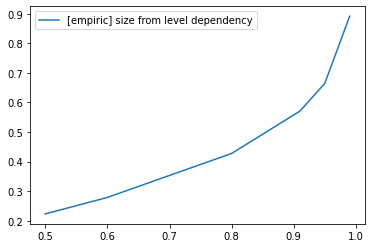

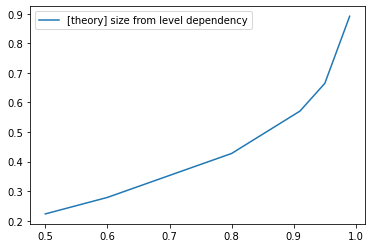

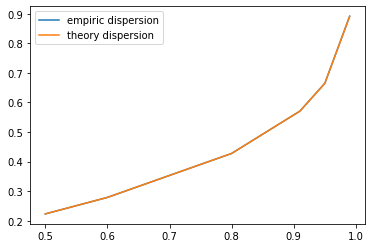


-------------------------END-------------------------

------------------------START------------------------

Выборка размером: 150

Теоретическое МО: 0.478700
Теоретическая дисперсия: 1.096260
Точечная оценка МО: 0.501841
Точечная несмещенная оценка дисперсии: 1.109600


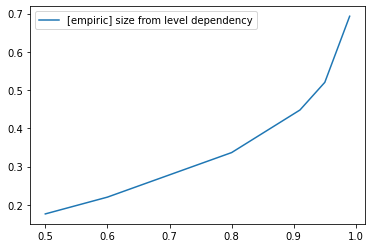

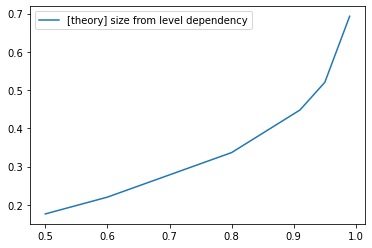

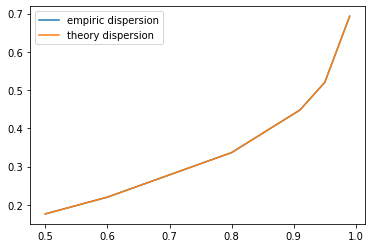


-------------------------END-------------------------



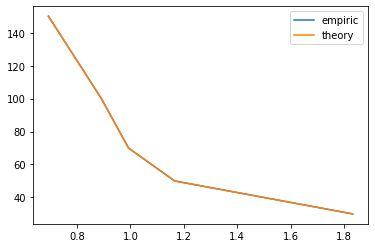

In [7]:
# 9. Пункты 2 - 8 с различным обьемом выборки
d_e_fracs = []
d_t_fracs = []
for i in n_values:
    e, t = confidence_interval_d(i)
    d_e_fracs.append(e)
    d_t_fracs.append(t)

# 10. График зависимости величины доверительного интервала от объема выборки
plt.plot(d_e_fracs, n_values, label="empiric")
plt.plot(d_t_fracs, n_values, label="theory")
plt.legend()
plt.show()